In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
from datetime import datetime, timedelta

In [93]:
MLD = 10
DEPTH = 200

t_profile = np.empty(DEPTH)
t_profile[0:MLD] = 29.25
t_profile[MLD:] = 29.25 - 0.04*np.arange(1,DEPTH-MLD+1,1)

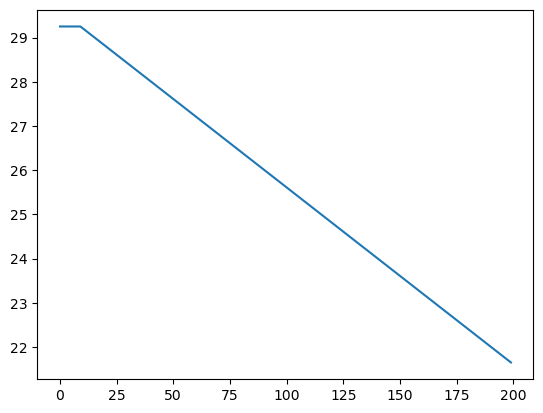

In [94]:
plt.plot(t_profile)

In [104]:
start = - DEPTH + 0.5
end = 0.5

z_levels = np.arange(start,end,1)[::-1]

In [105]:
def generate_time_range(start, end, delta):
    current_date = start
    while current_date < end:
        yield current_date
        current_date += timedelta(seconds=delta)

In [106]:
start = datetime(2011, 4, 1)
end = datetime(2011, 4, 5)
delta = 10
date_list = list(generate_time_range(start, end, delta))

In [107]:
with open("/gpfs/f5/gfdl_o/scratch/Marta.Mrozowska/hurricane_LES/MOM6_SCM_Hurr/analysis/compare_with_GOTM/cases/t_prof.dat", "w", encoding='utf-8') as file:
    for date in date_list:
        data_string_list = [f"{z}\t{t}" for z, t in zip(z_levels,t_profile)]
        data_string = "\n".join(data_string_list)
        file.write(f"{str(date)}\t{DEPTH}\t{2}\n{data_string}\n")